### Example 1

$$\frac{dy(t)}{dt} = -k \; y(t)$$

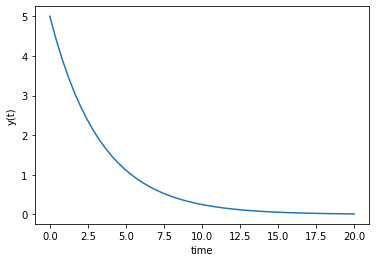

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0, 20)

# solve ODE
y = odeint(model, y0, t)

plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

### Example 2

$$\frac{dy(t)}{dt} = -y(t) + 1$$

$$y(0) = 0$$

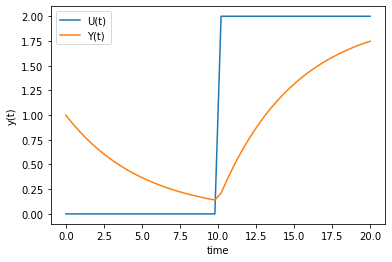

In [2]:
def model(y, t):
    dydt = (-y + u(t)) / 5
    return dydt

def u(t):
    if t >= 10:
        return 2
    return 0

# initial condition
y0 = 1

t = np.linspace(0, 20)
u_t = [u(i) for i in t]

y = odeint(model, y0, t)

plt.plot(t, u_t, label="U(t)")
plt.plot(t, y, label="Y(t)")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

### Example 3

Solve for x(t) and y(t) and show that the solutions are equivalent. 

$$\frac{dx(t)}{dt} = 3 e^{-t}$$

$$\frac{dy(t)}{dt} = 3 - y(t)$$

$$x(0) = 0$$

$$y(0) = 0$$

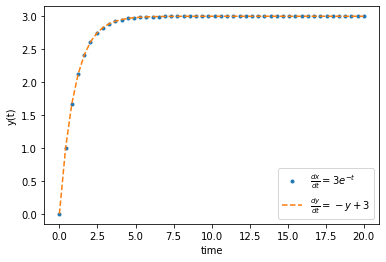

In [3]:
def dxdt(x, t):
    return 3 * np.exp(-t)

def dydt(y, t):
    return 3 - y

x0 = 0
y0 = 0

# time points
t = np.linspace(0, 20)

# solve ODE
x = odeint(dxdt, x0, t)
y = odeint(dydt, y0, t)

plt.plot(t, x, ".", label=r"$\frac{dx}{dt}=3 e^{-t}$")
plt.plot(t, y, "--", label=r"$\frac{dy}{dt}=-y+3$")
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

### Example 4

$$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$$

$$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$$

$$u = 2 \, S(t-5), \; x(0) = 0, \; y(0) = 0$$

Where $S(t−5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

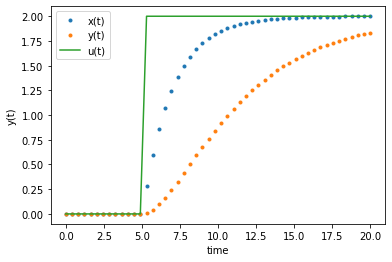

In [4]:
def s(t):
    if t >= 5:
        return 1
    return 0

def u(t):
    return 2 * s(t)

def model(z, t):
    x, y = z
    dxdt = (-x + u(t)) / 2
    dydt = (-y + x) / 5
    return [dxdt, dydt]

x0_y0 = [0, 0]

t = np.linspace(0, 20)
u_t = [u(i) for i in t]

# solve ODE
solution = odeint(model, x0_y0, t)

plt.plot(t, solution[:, 0], ".", label="x(t)")
plt.plot(t, solution[:, 1], ".", label="y(t)")
plt.plot(t, u_t, label="u(t)")
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()